In [2]:
import pandas as pd

In [39]:
df_wine = pd.read_csv("data/wine.data", header=None)

In [5]:
df_wine.columns = ['ClassLabel',
'Alcohol',
'Malicacid',
'Ash',
'Alcalinityofash',
'Magnesium',
'Totalphenols',
'Flavanoids',
'Nonflavanoidphenols',
'Proanthocyanins',
'Colorintensity',
'Hue',
'OD280/OD315ofdilutedwines',
'Proline']

df_wine.head()

,ClassLabel,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdilutedwines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0,
                                                    stratify=y)

### 針對

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

X_train_std[:5,:]

array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
        -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
        -0.20017028, -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
         1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
         1.33982592,  0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605,  0.81104754,  0.13597904,
         1.09807851,  1.16326665, -0.64419483,  1.25249578,  0.25863359,
         1.06806189,  0.1308109 ,  1.62934866],
       [ 0.57866141, -0.4736459 ,  0.98882252, -0.24093881,  0.77628541,
         0.04092218,  0.45700044, -0.64419483, -0.1709626 , -0.37693052,
         0.66041583,  0.36170844,  1.045438  ],
       [-0.52655446,  0.09083903, -0.68979922, -0.39122257, -0.36203702,
        -1.1463457 , -1.37732987,  2.16151323, -1.18771859,  0.85182676,
        -1.01546239, -1.49990297, -0.18384759]])

In [19]:
from sklearn.linear_model import LogisticRegression

### 使用未標準化過的測試集與訓練集, 進行 Logistics Regression 訓練, 計算訓練集與測試集的正確率

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('training accuracy: ', lr.score(X_train, y_train))
print('test accuracy: ', lr.score(X_test, y_test))

training accuracy:  0.983870967742
test accuracy:  0.944444444444


### 使用標準化過的測試集與訓練集, 進行 Logistics Regression 訓練, 計算訓練集與測試集的正確率

In [31]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
print('training accuracy: ', lr.score(X_train_std, y_train))
print('test accuracy: ', lr.score(X_test_std, y_test))

training accuracy:  0.991935483871
test accuracy:  1.0


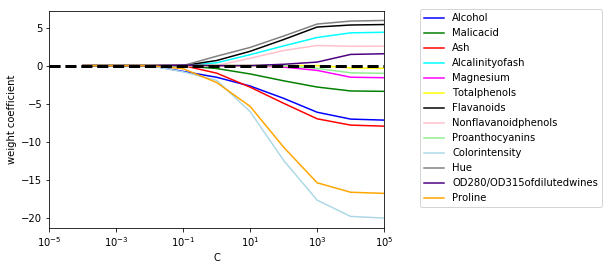

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()